K=2, SSE=441.7922


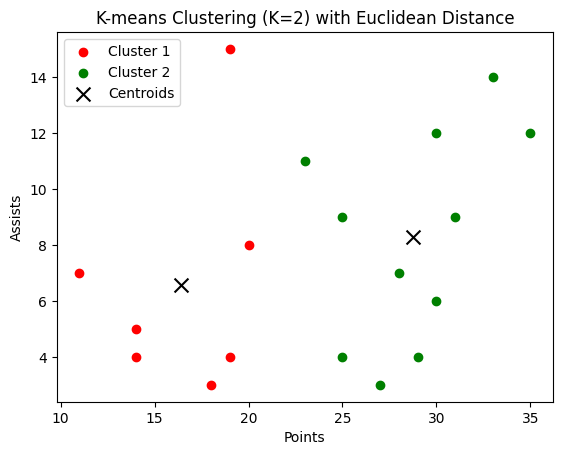

K=3, SSE=287.7857


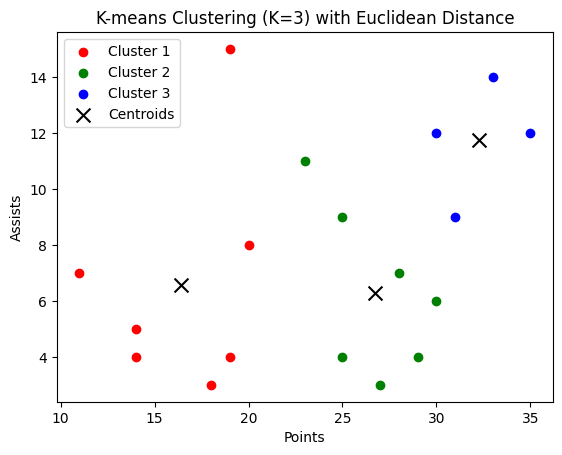

K=4, SSE=269.2857


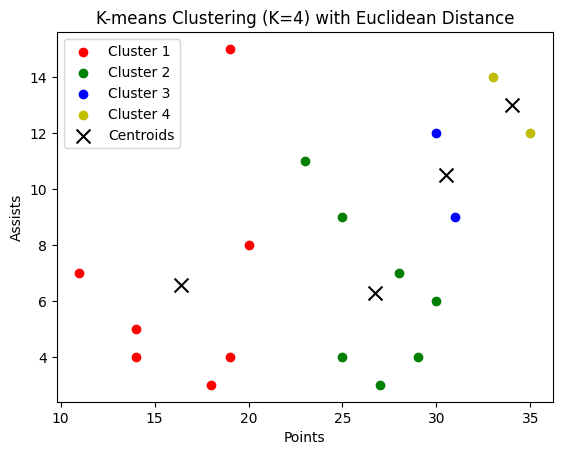

K=2, SSE=749.7578


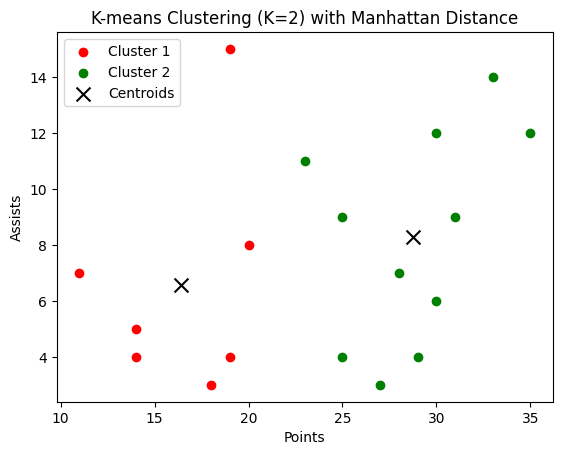

K=3, SSE=471.5153


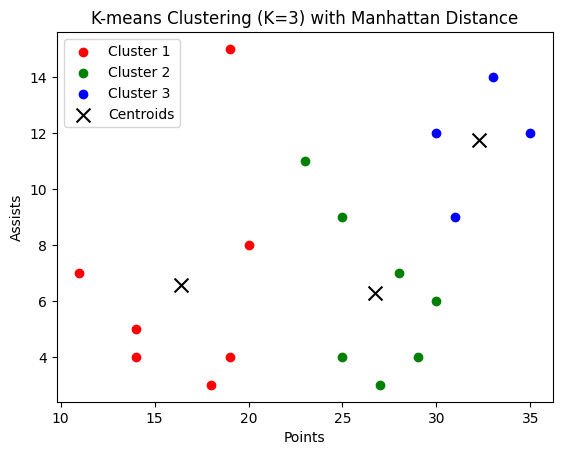

K=4, SSE=405.7441


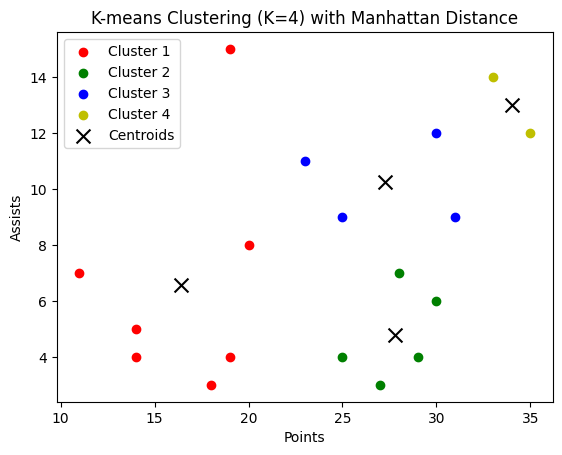

K=2, SSE=414.3165


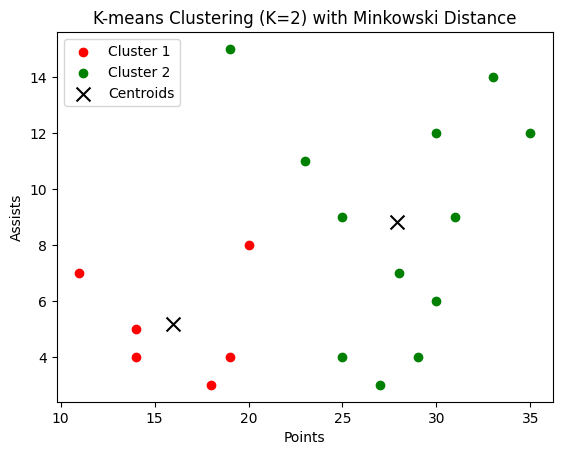

K=3, SSE=270.0766


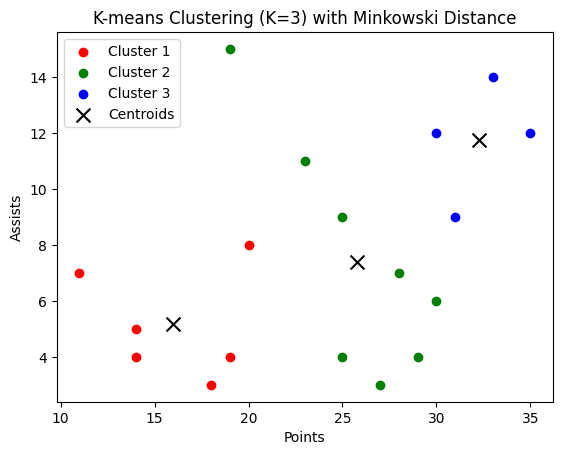

K=4, SSE=252.0128


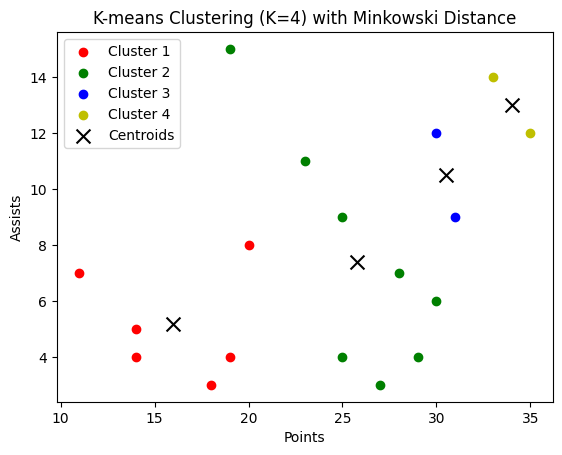

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for 20 basketball players: points, assists, and rebounds
data = np.array([
    [18.0, 3.0, 15.0],
    [19.0, 4.0, 14.0],
    [14.0, 5.0, 10.0],
    [14.0, 4.0, 8.0],
    [11.0, 7.0, 14.0],
    [20.0, 8.0, 13.0],
    [28.0, 7.0, 9.0],
    [30.0, 6.0, 5.0],
    [31.0, 9.0, 4.0],
    [35.0, 12.0, 11.0],
    [33.0, 14.0, 6.0],
    [25.0, 9.0, 5.0],
    [25.0, 4.0, 3.0],
    [27.0, 3.0, 8.0],
    [29.0, 4.0, 12.0],
    [30.0, 12.0, 7.0],
    [19.0, 15.0, 6.0],
    [23.0, 11.0, 5.0]
])

# Helper functions to calculate distances
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

# K-means clustering function
def k_means_clustering(data, k, distance_metric):
    # Randomly initialize cluster centroids
    np.random.seed(0)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for iteration in range(10):  # Perform a fixed number of iterations
        clusters = [[] for _ in range(k)]
        
        # Assign each data point to the nearest centroid
        for point in data:
            distances = [distance_metric(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        
        # Update centroids
        new_centroids = []
        for cluster in clusters:
            new_centroids.append(np.mean(cluster, axis=0) if cluster else centroids[len(new_centroids)])
        centroids = np.array(new_centroids)

    return centroids, clusters

# Function to calculate Sum of Squared Errors (SSE)
def calculate_sse(clusters, centroids, distance_metric):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += distance_metric(point, centroids[i]) ** 2
    return sse

# Plotting function
def plot_clusters(clusters, centroids, title):
    colors = ['r', 'g', 'b', 'y']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title(title)
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.legend()
    plt.show()

# Perform K-means clustering with K=2, K=3, K=4 using Euclidean distance
for k in [2, 3, 4]:
    centroids, clusters = k_means_clustering(data[:, :2], k, euclidean_distance)  # Use only first two columns (2D)
    sse = calculate_sse(clusters, centroids, euclidean_distance)
    print(f"K={k}, SSE={sse:.4f}")
    plot_clusters(clusters, centroids, f"K-means Clustering (K={k}) with Euclidean Distance")

# Redo using Manhattan distance
for k in [2, 3, 4]:
    centroids, clusters = k_means_clustering(data[:, :2], k, manhattan_distance)
    sse = calculate_sse(clusters, centroids, manhattan_distance)
    print(f"K={k}, SSE={sse:.4f}")
    plot_clusters(clusters, centroids, f"K-means Clustering (K={k}) with Manhattan Distance")

# Redo using Minkowski distance
for k in [2, 3, 4]:
    centroids, clusters = k_means_clustering(data[:, :2], k, minkowski_distance)
    sse = calculate_sse(clusters, centroids, minkowski_distance)
    print(f"K={k}, SSE={sse:.4f}")
    plot_clusters(clusters, centroids, f"K-means Clustering (K={k}) with Minkowski Distance")


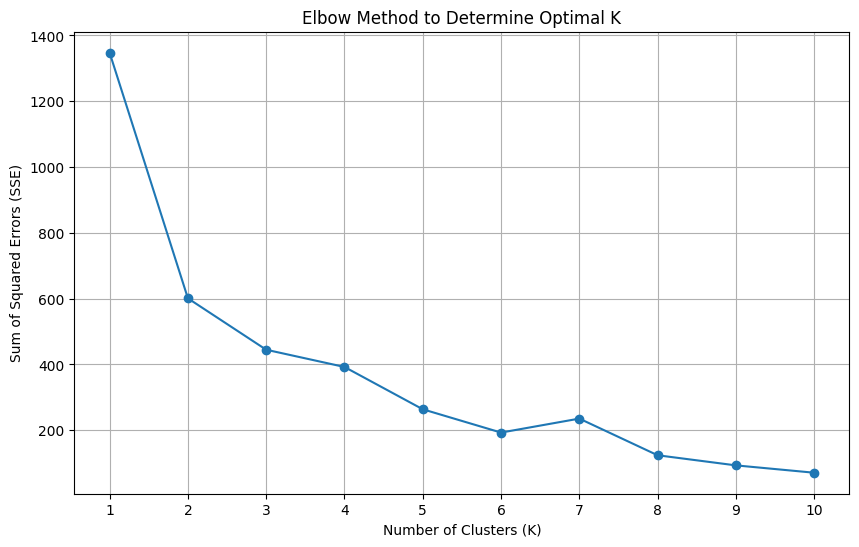

Optimal number of clusters (K) determined by the Elbow method: 7


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Simulated data (replace with your actual data if using 'baseball.csv')
df = pd.DataFrame({
    'Points': [18.0, 19.0, 14.0, 14.0, 11.0, 20.0, 28.0, 30.0, 31.0, 35.0, 33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0],
    'Assists': [3.0, 4.0, 5.0, 4.0, 7.0, 8.0, 7.0, 6.0, 9.0, 12.0, 14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0],
    'Rebounds': [15.0, 14.0, 10.0, 8.0, 14.0, 13.0, 9.0, 5.0, 4.0, 11.0, 6.0, 5.0, 3.0, 8.0, 12.0, 7.0, 6.0, 5.0]
})

# Helper function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means clustering function to compute SSE
def k_means_clustering_and_sse(df, k):
    # Randomly initialize cluster centroids
    np.random.seed(0)
    centroids = df.sample(n=k).to_numpy()

    for iteration in range(10):  # Perform a fixed number of iterations
        clusters = [[] for _ in range(k)]
        
        # Assign each data point to the nearest centroid
        for index, row in df.iterrows():
            point = row.to_numpy()
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Update centroids
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                new_centroids.append(centroids[len(new_centroids)])  # Keep old centroid if cluster is empty
        centroids = np.array(new_centroids)

    # Compute SSE
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i]) ** 2

    return sse

# Compute SSE for K=1 to K=10 and store results
sse_values = []
k_values = range(1, 11)
for k in k_values:
    sse = k_means_clustering_and_sse(df, k)
    sse_values.append(sse)

# Plot K vs. SSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Determine Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal K using the Elbow method and mark it
optimal_k = np.argmin(np.gradient(np.gradient(sse_values))) + 1  # Estimate the elbow point
print(f"Optimal number of clusters (K) determined by the Elbow method: {optimal_k}")
